
Задание
Постройте распределение клиентских платежей (с помощью гистограммы) и оцените, насколько данное распределение похоже на нормальное с помощью правила трех сигм (а также одной и двух сигм).

Проведите такой же анализ близости к нормальному распределению для каждого типа устройства клиентов по отдельности. Платежи по какому типу устройства больше всего похожи на нормальное распределение?

Создайте датафрейм df_res со следующей структурой:

Каждая строка показывает свой тип устройства (итого 3 строки).

Колонки:

Тип устройства
Процент выборки внутри среднее плюс-минус одна сигма (1sigma)
Процент выборки внутри среднее плюс-минус две сигмы (2sigma)
Процент выборки внутри среднее плюс-минус три сигмы (3sigma)
Разница по сравнению с соответствующим показателем нормального распределения - 68% (diff1sigma)
Разница по сравнению с соответствующим показателем нормального распределения - 95% (diff2sigma)
Разница по сравнению с соответствующим показателем нормального распределения - 99.7% (diff3sigma)

Задание со звездочкой

Что если типов устройства не 3, а 100?

Придумайте, как автоматизировать и масштабировать свои вычисления, чтобы на выходе получался такой же датафрейм *df_res,* но с сотней строк.

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

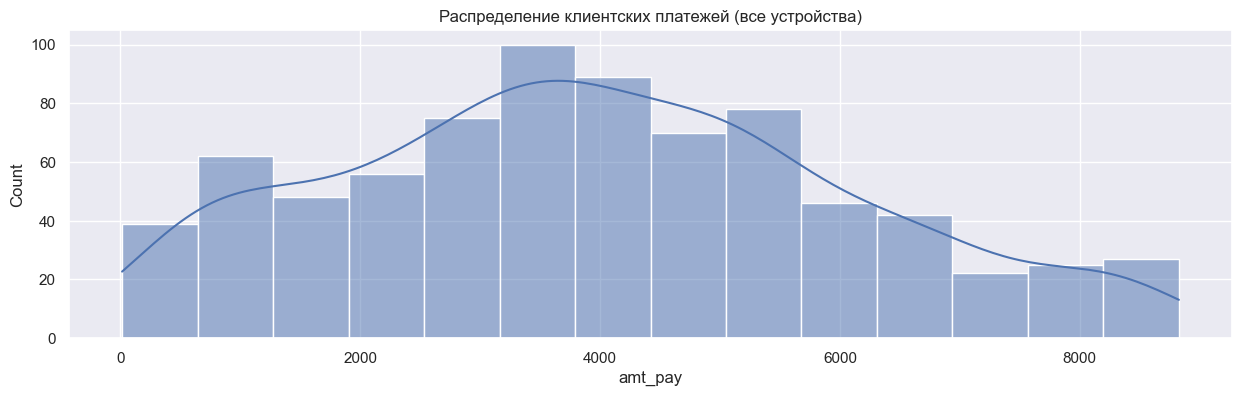

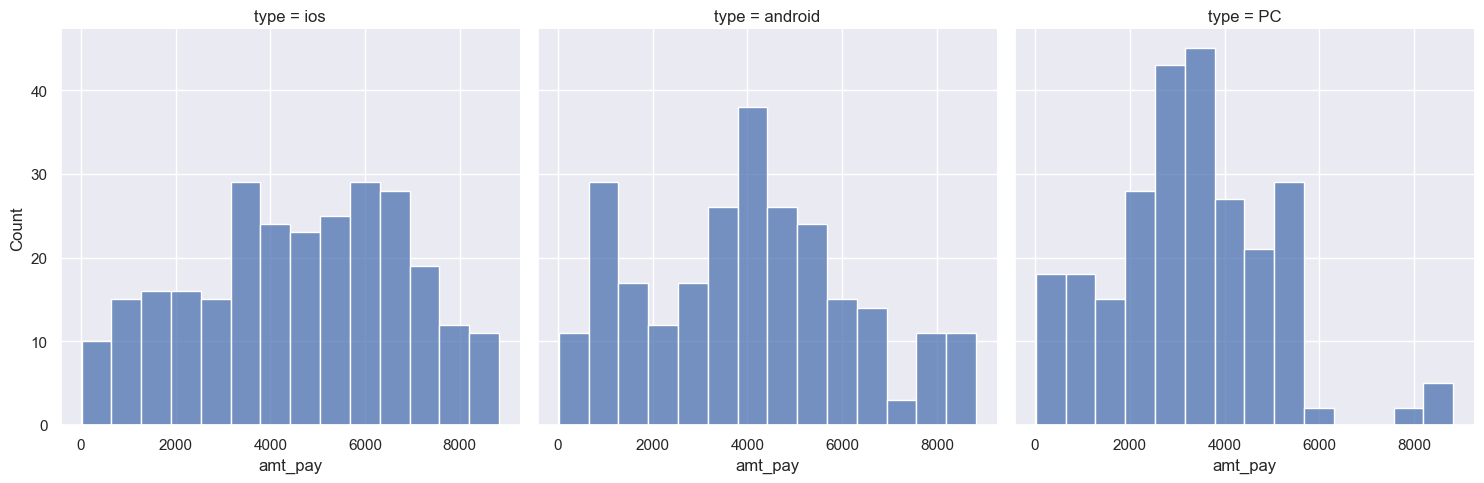

По всем данным вне зависимости от устройства получены следующие результаты:
Доля наблюдений в 1 сигме: 64.698 % , отклонение от эталона: -0.0356 процентных пункта
Доля наблюдений в 2 сигмах: 96.662 % , отклонение от эталона: 0.0122 процентных пункта
Доля наблюдений в 3 сигмах: 100.0 % , отклонение от эталона: 0.0028 процентных пункта
Суммарное отклонение по всем сигмам составляет: 5.06 процентных пунктов
Следовательно, данное распределение близко к нормальному
В представленной ниже таблице рассмотрены 3 сигмы по устройствам и их отклонения от эталона

           1sigma    2sigma    3sigma diff1sigma diff2sigma diff3sigma
type                                                                  
PC       0.667984  0.972332  0.980237   0.014616  -0.017932   0.016963
android  0.629921  0.980315       1.0   0.052679  -0.025915    -0.0028
ios      0.628676  0.988971       1.0   0.053924  -0.034571    -0.0028
Распределение платежей с устройства PC больше всего похоже на нормальное
Суммарное откл

In [7]:
# Задание выполнено с учётом требований задания со звёздочкой, цикл может обрабатывать сколько угодно разных устройств
# и искать среди них то, платежи по которому наиболее приближены к нормальному распределению.
# Также в нём можно менять переменные для уточнения критериев принятия решения в отчёте.
# Код закомментирован по "главам" и отдельным пунктам пятью и одной решёткой соответственно

##### Импортируем файлы
df_dc = pd.read_csv('device_client.csv', sep = ';')
df_pc = pd.read_csv('payment_client.csv', sep = ';')

##### Создаём объединённый датафрейм
df_merged = df_pc.merge(df_dc)

##### Рисуем распределение числа клиентских платежей по всем устройствам
sns.set(rc={'figure.figsize':(15,4)})
sns.histplot(data=df_merged, x="amt_pay", kde = True)
plt.title('Распределение клиентских платежей (все устройства)')

##### Рисуем распределения отдельно по устройствам
sns.set(rc={'figure.figsize':(4,3)})
sns.displot(df_merged, x="amt_pay", col="type")
plt.show()

##### Создаём список уникальных встречающихся устройств
devices = df_dc.groupby('type').nunique().reset_index()['type'].tolist()

##### Создаём требуемый пустой датафрейм
df_res = pd.DataFrame(columns = ['type', '1sigma', '2sigma', '3sigma', 'diff1sigma', 'diff2sigma', 'diff3sigma'])

##### Заполняем строки датафрейма обнаруженными уникальными девайсами
for i in range(len(devices)):
    df_res.loc[i, 'type'] = devices[i]

##### Дефайним сигмы нормального распределения
one_sigma_norm = 0.6826 # 0.68 по данным эталонного ответа
two_sigma_norm = 0.9544 # 0.95 по данным эталонного ответа
three_sigma_norm = 0.9972 # 0.997 по данным эталонного ответа

#one_sigma_norm = 0.68 #по данным эталонного ответа
#two_sigma_norm = 0.95 #по данным эталонного ответа
#three_sigma_norm = 0.997 #по данным эталонного ответа
    
##### Считаем все 3 сигмы по всем данным независимо от типа устройства
m_all = df_merged['amt_pay'].mean()
s_all = df_merged['amt_pay'].std()

df_one_sigma_all = df_merged[(df_merged['amt_pay'] >= m_all - s_all) & (df_merged['amt_pay'] <= m_all + s_all)]
df_two_sigma_all = df_merged[(df_merged['amt_pay'] >= m_all - 2*s_all) & (df_merged['amt_pay'] <= m_all + 2*s_all)]
df_three_sigma_all = df_merged[(df_merged['amt_pay'] >= m_all - 3*s_all) & (df_merged['amt_pay'] <= m_all + 3*s_all)]

one_sigma_all = df_one_sigma_all.count()['id_client'] / df_merged.count()['id_client']
two_sigma_all = df_two_sigma_all.count()['id_client'] / df_merged.count()['id_client']
three_sigma_all = df_three_sigma_all.count()['id_client'] / df_merged.count()['id_client']

##### Сравниваем полученные показатели с эталонными
print('==========================================================================================')
print('По всем данным вне зависимости от устройства получены следующие результаты:')
print('Доля наблюдений в 1 сигме:', round(one_sigma_all, 5)*100, '% , отклонение от эталона:', round(((one_sigma_norm-one_sigma_all)*-1), 4), 'процентных пункта')
print('Доля наблюдений в 2 сигмах:', round(two_sigma_all, 5)*100, '% , отклонение от эталона:', round(((two_sigma_norm-two_sigma_all)*-1), 4), 'процентных пункта')
print('Доля наблюдений в 3 сигмах:', round(three_sigma_all, 5)*100, '% , отклонение от эталона:', round(((three_sigma_norm-three_sigma_all)*-1), 4), 'процентных пункта')

##### Суммарное отклонение от эталона и критерий приемлемости решения
diff_all = round(((abs(one_sigma_norm-one_sigma_all)) + (abs(two_sigma_norm-two_sigma_all)) + (abs(three_sigma_norm-three_sigma_all))) , 4)*100

crit = 6 # Разница в процентных пунктах по отношению к эталону

print('Суммарное отклонение по всем сигмам составляет:', diff_all, 'процентных пунктов')
if abs(diff_all) < crit:
    print('Следовательно, данное распределение близко к нормальному')
else:
    print('Т.к. разница по отношению к нормальному распределению слишком велика, то это распределение далеко от нормального')

print('==========================================================================================')

##### Создаём функцию, которая считает нам все столбцы для передаваемого в неё типа устройства 
#     и присваивает новые искомые значения в таблицу

def calc(d):

    df_device = df_merged[df_merged['type'] == d]

    m = df_device['amt_pay'].mean()
    s = df_device['amt_pay'].std()

    df_one_sigma = df_device[(df_device['amt_pay'] >= m - s) & (df_device['amt_pay'] <= m + s)]
    df_two_sigma = df_device[(df_device['amt_pay'] >= m - 2*s) & (df_device['amt_pay'] <= m + 2*s)]
    df_three_sigma = df_device[(df_device['amt_pay'] >= m - 3*s) & (df_device['amt_pay'] <= m + 3*s)]

    one_sigma = df_one_sigma.count()['id_client'] / df_device.count()['id_client']
    two_sigma = df_two_sigma.count()['id_client'] / df_device.count()['id_client']
    three_sigma = df_three_sigma.count()['id_client'] / df_device.count()['id_client']

    one_sigma_diff = one_sigma_norm - one_sigma
    two_sigma_diff = two_sigma_norm - two_sigma
    three_sigma_diff = three_sigma_norm - three_sigma
    
    df_res.set_index('type', inplace = True)
    
    df_res.loc[d, '1sigma'] = one_sigma
    df_res.loc[d, '2sigma'] = two_sigma
    df_res.loc[d, '3sigma'] = three_sigma
    
    df_res.loc[d, 'diff1sigma'] = one_sigma_diff
    df_res.loc[d, 'diff2sigma'] = two_sigma_diff
    df_res.loc[d, 'diff3sigma'] = three_sigma_diff
    
    df_res.reset_index(inplace = True)

##### Циклом пробегаемся по списку уникальных устройств и выполняем предыдущую функцию, тем самым заполняем табличку
for i in devices:
    calc(i)

# Демонстрируем табличку с данными
print('В представленной ниже таблице рассмотрены 3 сигмы по устройствам и их отклонения от эталона')
print()
df_res.set_index('type', inplace = True) # Для красоты показываем табличку без индекса
print(df_res)
df_res.reset_index(inplace = True) # Возвращаем индексы на место для дальнейшего использования

##### Циклом ищем победителя по самому низкому суммарному отклонению от эталона

winner = '' # Пока кандидат пустует, но string мы для него уже подготовили

# За отправную точку берём первого кандидата с индексом 0 т.к. в этой части кода индексы уже сброшены
# Для него считаем суммарную разницу по сигмам из таблички и записываем

min_sum_diff = abs(df_res.at[0, 'diff1sigma']) + abs(df_res.at[0, 'diff2sigma']) + abs(df_res.at[0, 'diff3sigma'])

for i in devices:
    df_res.set_index('type', inplace = True) # т.к. итерируемся по типу устройства, индекс делаем соответствующий
    
    sum_diff = abs(df_res.at[i, 'diff1sigma']) + abs(df_res.at[i, 'diff2sigma']) + abs(df_res.at[i, 'diff3sigma'])

    if sum_diff <= min_sum_diff: # Если у кандидата i отклонение меньше или вдруг первый оказался тем самым победителем
        min_sum_diff = sum_diff # Записываем его результат
        winner = i # И даруем заслуженное место победителя
    
    df_res.reset_index(inplace = True) # Приводим табличку в первозданный вид

##### Хвалимся именем и результатом победителя
print('==========================================================================================')
print(f"Распределение платежей с устройства {winner} больше всего похоже на нормальное") #в таком формате без лишних пробелов
#print('Распределение платежей с устройства "', winner, '" больше всего похоже на нормальное')
print('Суммарное отклонение от эталона составляет всего', round((min_sum_diff*100), 2), 'процентных пунктов')
